In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

In [31]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [32]:
!wget $data

--2025-11-08 09:16:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.006s  

2025-11-08 09:16:56 (135 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [33]:
df = pd.read_csv(data)

In [34]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [35]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [36]:
df.loc[df['num_doors'] < 0, 'num_doors'] = 0

In [37]:
print(df.isnull().sum())

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


In [65]:
numerical = ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 
             'num_doors']
categorical = ['origin' ,'fuel_type', 'drivetrain']

In [66]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna('NA')

In [67]:
print(df.isnull().sum())

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64


In [68]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=1)

In [69]:
len(df_train), len(df_val)

(7763, 1941)

In [70]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [71]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [72]:
dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [73]:
X_val

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19410 stored elements and shape (1941, 14)>

In [74]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [75]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [76]:
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=1, random_state=42 )
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [77]:
y_pred = dt.predict(X_val)

In [78]:
mse = mean_squared_error(y_val, y_pred)

In [79]:
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 2.69
Root Mean Square Error (RMSE): 1.64


In [80]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3024.47
|   |--- value: [16.87]
|--- vehicle_weight >  3024.47
|   |--- value: [12.89]



In [81]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [73]:
mse = mean_squared_error(y_val, y_pred)

In [74]:
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Square Error (RMSE): {rmse:.3f}")

Mean Squared Error (MSE): 0.202
Root Mean Square Error (RMSE): 0.449


In [82]:
scores = [] # This will store the RMSE for each n_estimators value
n_estimators_values = [] # This will store the n values for plotting

for n in range(10, 201, 10):
    # 1. Store the current n value
    n_estimators_values.append(n)
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    scores.append((n, rmse))

In [83]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

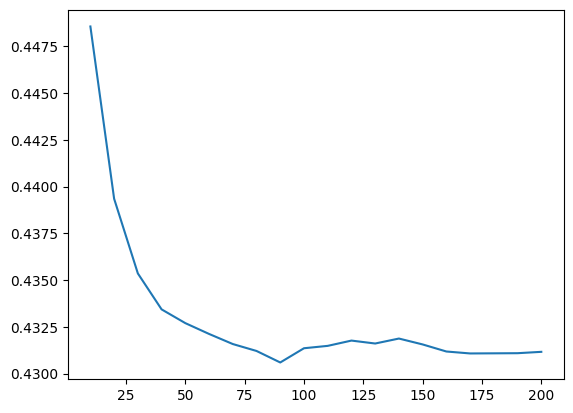

In [84]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [85]:
scores = [] # This will store the RMSE for each n_estimators value
n_estimators_values = [] # This will store the n values for plotting

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        # 1. Store the current n value
        n_estimators_values.append(n)
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        
        scores.append((d, n, rmse))

In [86]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

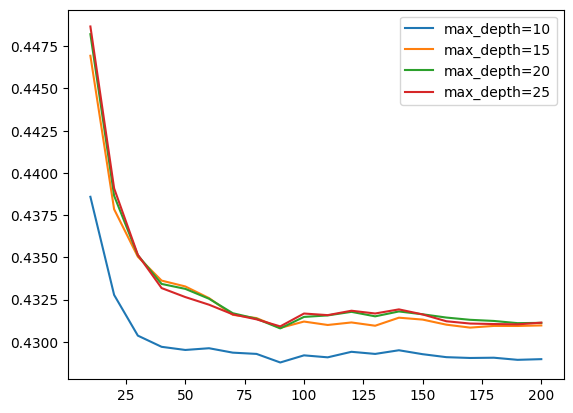

In [88]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [97]:
# Assuming 'dv' is the DictVectorizer or other transformer you used to create X_train
feature_names = dv.get_feature_names_out()

importances = rf.feature_importances_      

# CORRECTED LINE: Use the feature names from the vectorizer/transformer
feature_importances = pd.Series(importances, index=feature_names) 

# Sort and display the top features
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print(top_5_features)

vehicle_weight         0.960299
horsepower             0.015411
acceleration           0.011654
model_year             0.003376
engine_displacement    0.003313
dtype: float64


In [98]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 53.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 47.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [99]:
import xgboost as xgb

In [101]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [108]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [109]:
y_pred = model.predict(dval)

In [110]:
mse = mean_squared_error(y_val, y_pred)

In [111]:
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Square Error (RMSE): {rmse:.3f}")

Mean Squared Error (MSE): 0.176
Root Mean Square Error (RMSE): 0.419
